# Project 3 - Wake County Real Estate Price Prediction
### CS 5/7394 - Applied Machine Learning

In [24]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

In [2]:
housing = pd.read_csv("C:/Users/Joshua Ayodele/Downloads/archive (5)/WakeCountyHousing.csv")

In [3]:
housing.head()

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip
0,19,0.21,34500,1/1/1974,January 1974,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,Raleigh,27610.0
1,20,0.46,35500,5/18/1983,May 1983,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,Raleigh,27610.0
2,22,0.46,37500,9/16/2004,September 2004,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,Wendell,27591.0
3,25,0.96,70000,1/1/1971,January 1971,1971,1971,1971,3770,One Story,Conventional,Other,WGE,Raleigh,27613.0
4,30,0.47,380000,8/12/2015,August 2015,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,Raleigh,27607.0


In [4]:
housing.describe()

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Physical_Zip
count,308292.000000,308292.000000,3.082920e+05,308292.000000,308292.000000,308292.000000,308292.000000,308146.000000
mean,244524.805863,0.443446,2.738410e+05,2009.583593,1994.992666,1995.810647,2267.375890,27572.340936
std,129858.542506,1.851256,1.904003e+05,10.517202,19.671737,19.321347,997.488231,41.800280
min,19.000000,0.000000,0.000000e+00,1956.000000,0.000000,0.000000,220.000000,27501.000000
25%,140864.750000,0.140000,1.500000e+05,2004.000000,1986.000000,1986.000000,1532.000000,27526.000000
50%,244362.500000,0.240000,2.350000e+05,2013.000000,1999.000000,2000.000000,2087.000000,27591.000000
75%,346481.250000,0.420000,3.500000e+05,2018.000000,2007.000000,2008.000000,2794.000000,27610.000000
max,484520.000000,307.910000,6.100200e+06,2021.000000,2022.000000,2209.000000,21993.000000,27713.000000


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308292 entries, 0 to 308291
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Real_Estate_Id      308292 non-null  int64  
 1   Deeded_Acreage      308292 non-null  float64
 2   Total_Sale_Price    308292 non-null  int64  
 3   Total_Sale_Date     308292 non-null  object 
 4   Month_Year_of_Sale  308292 non-null  object 
 5   Year_of_Sale        308292 non-null  int64  
 6   Year_Built          308292 non-null  int64  
 7   Year_Remodeled      308292 non-null  int64  
 8   Heated_Area         308292 non-null  int64  
 9   Num_Stories         308292 non-null  object 
 10  Design_Style        308292 non-null  object 
 11  Bath                308275 non-null  object 
 12  Utilities           306324 non-null  object 
 13  Physical_City       308183 non-null  object 
 14  Physical_Zip        308146 non-null  float64
dtypes: float64(2), int64(6), object(7)

In [6]:
housing.isna().any()

Real_Estate_Id        False
Deeded_Acreage        False
Total_Sale_Price      False
Total_Sale_Date       False
Month_Year_of_Sale    False
Year_of_Sale          False
Year_Built            False
Year_Remodeled        False
Heated_Area           False
Num_Stories           False
Design_Style          False
Bath                   True
Utilities              True
Physical_City          True
Physical_Zip           True
dtype: bool

## 1. Cleaning the data(dealing with missing values)

In [7]:
housing = housing.dropna()
#dropping any null variables from the dataframe

In [8]:
housing.isna().any()
#We see there are no longer any null variables

Real_Estate_Id        False
Deeded_Acreage        False
Total_Sale_Price      False
Total_Sale_Date       False
Month_Year_of_Sale    False
Year_of_Sale          False
Year_Built            False
Year_Remodeled        False
Heated_Area           False
Num_Stories           False
Design_Style          False
Bath                  False
Utilities             False
Physical_City         False
Physical_Zip          False
dtype: bool

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306161 entries, 0 to 308291
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Real_Estate_Id      306161 non-null  int64  
 1   Deeded_Acreage      306161 non-null  float64
 2   Total_Sale_Price    306161 non-null  int64  
 3   Total_Sale_Date     306161 non-null  object 
 4   Month_Year_of_Sale  306161 non-null  object 
 5   Year_of_Sale        306161 non-null  int64  
 6   Year_Built          306161 non-null  int64  
 7   Year_Remodeled      306161 non-null  int64  
 8   Heated_Area         306161 non-null  int64  
 9   Num_Stories         306161 non-null  object 
 10  Design_Style        306161 non-null  object 
 11  Bath                306161 non-null  object 
 12  Utilities           306161 non-null  object 
 13  Physical_City       306161 non-null  object 
 14  Physical_Zip        306161 non-null  float64
dtypes: float64(2), int64(6), object(7)

## 2. Using Ordinal Encoder

In [10]:
obj = ["Total_Sale_Date", "Month_Year_of_Sale", "Num_Stories", "Bath", "Utilities", "Physical_City"]
#Creating a list of categorical variables in order to perform ordinal encoder

In [11]:
ordinal_encoder = OrdinalEncoder()
housing[obj] = ordinal_encoder.fit_transform(housing[obj])

In [12]:
housing.head()

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip
0,19,0.21,34500,14.0,192.0,1974,1964,1964,1828,0.0,Split level,2.0,0.0,12.0,27610.0
1,20,0.46,35500,5983.0,378.0,1983,1970,1970,1240,0.0,Conventional,0.0,1.0,12.0,27610.0
2,22,0.46,37500,9361.0,531.0,2004,1900,1900,2261,0.0,Conventional,2.0,13.0,15.0,27591.0
3,25,0.96,70000,11.0,189.0,1971,1971,1971,3770,0.0,Conventional,6.0,11.0,12.0,27613.0
4,30,0.47,380000,8388.0,82.0,2015,1946,2017,1789,0.0,Conventional,2.0,0.0,12.0,27607.0


In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306161 entries, 0 to 308291
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Real_Estate_Id      306161 non-null  int64  
 1   Deeded_Acreage      306161 non-null  float64
 2   Total_Sale_Price    306161 non-null  int64  
 3   Total_Sale_Date     306161 non-null  float64
 4   Month_Year_of_Sale  306161 non-null  float64
 5   Year_of_Sale        306161 non-null  int64  
 6   Year_Built          306161 non-null  int64  
 7   Year_Remodeled      306161 non-null  int64  
 8   Heated_Area         306161 non-null  int64  
 9   Num_Stories         306161 non-null  float64
 10  Design_Style        306161 non-null  object 
 11  Bath                306161 non-null  float64
 12  Utilities           306161 non-null  float64
 13  Physical_City       306161 non-null  float64
 14  Physical_Zip        306161 non-null  float64
dtypes: float64(8), int64(6), object(1)

In [14]:
housing.corr()

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Bath,Utilities,Physical_City,Physical_Zip
Real_Estate_Id,1.000000,-0.108016,0.317498,0.030353,0.044009,0.454750,0.830396,0.790026,0.275499,0.335690,0.338377,-0.133703,-0.135589,-0.201084
Deeded_Acreage,-0.108016,1.000000,0.062975,-0.018433,-0.014581,-0.089072,-0.104051,-0.106081,0.070432,-0.034990,-0.005221,0.054585,0.042082,0.015938
Total_Sale_Price,0.317498,0.062975,1.000000,0.049075,0.037657,0.432193,0.297552,0.323936,0.748248,0.277957,0.499513,-0.070073,-0.137110,-0.104775
Total_Sale_Date,0.030353,-0.018433,0.049075,1.000000,-0.021100,0.115907,0.034951,0.037020,0.013895,0.038898,0.030842,-0.006912,-0.012870,-0.010885
Month_Year_of_Sale,0.044009,-0.014581,0.037657,-0.021100,1.000000,0.088124,0.037072,0.037807,0.007045,0.016991,0.013542,-0.003543,-0.007441,-0.009070
Year_of_Sale,0.454750,-0.089072,0.432193,0.115907,0.088124,1.000000,0.374180,0.385661,0.120501,0.153756,0.156886,-0.074510,-0.043942,-0.075588
Year_Built,0.830396,-0.104051,0.297552,0.034951,0.037072,0.374180,1.000000,0.938909,0.298822,0.360617,0.398435,-0.095414,-0.140457,-0.187564
Year_Remodeled,0.790026,-0.106081,0.323936,0.037020,0.037807,0.385661,0.938909,1.000000,0.309811,0.347769,0.402481,-0.104005,-0.127868,-0.169310
Heated_Area,0.275499,0.070432,0.748248,0.013895,0.007045,0.120501,0.298822,0.309811,1.000000,0.373490,0.641242,-0.037674,-0.144578,-0.126918
Num_Stories,0.335690,-0.034990,0.277957,0.038898,0.016991,0.153756,0.360617,0.347769,0.373490,1.000000,0.437266,-0.091833,-0.092108,-0.066521


## 3. Using SGD Classifier

In [15]:
housing.head()

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip
0,19,0.21,34500,14.0,192.0,1974,1964,1964,1828,0.0,Split level,2.0,0.0,12.0,27610.0
1,20,0.46,35500,5983.0,378.0,1983,1970,1970,1240,0.0,Conventional,0.0,1.0,12.0,27610.0
2,22,0.46,37500,9361.0,531.0,2004,1900,1900,2261,0.0,Conventional,2.0,13.0,15.0,27591.0
3,25,0.96,70000,11.0,189.0,1971,1971,1971,3770,0.0,Conventional,6.0,11.0,12.0,27613.0
4,30,0.47,380000,8388.0,82.0,2015,1946,2017,1789,0.0,Conventional,2.0,0.0,12.0,27607.0


In [16]:
X = housing[['Deeded_Acreage', 'Total_Sale_Price', 'Year_Built']] 
Y = housing['Design_Style'] 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train)

SGDClassifier()

In [18]:
sgd_pred = sgd_clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, sgd_pred))

Accuracy: 0.6997860630705666


## 4. Using RandomForestClassifier

In [19]:
forest_clf = RandomForestClassifier(n_estimators=100, max_features=.2)
forest_clf.fit(x_train,y_train)

RandomForestClassifier(max_features=0.2)

In [20]:
forest_pred = forest_clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, forest_pred))

Accuracy: 0.914000620580406


## 5. Using OvO Classifier

In [38]:
ovo_clf = OneVsRestClassifier(LogisticRegression())
ovo_clf.fit(x_train, y_train)
ovo_pred = ovo_clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, ovo_pred))

Accuracy: 0.754576780494178


## 6. Using K Neighbors Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
neighbors_clf = KNeighborsClassifier(n_neighbors=3)
neighbors_clf.fit(x_train, y_train)
neighbors_pred = neighbors_clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, neighbors_pred))

Accuracy: 0.8356605098557968


## 7. Using Stratified K Fold

In [40]:
strat_fold = StratifiedKFold()
for train_index, test_index in strat_fold.split(x_train, y_train):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [  7282  16579  44702 ... 244925 244926 244927] TEST: [    0     1     2 ... 63532 70318 70491]
TRAIN: [     0      1      2 ... 244925 244926 244927] TEST: [  7282  16579  44702 ... 104053 105588 115106]
TRAIN: [     0      1      2 ... 244925 244926 244927] TEST: [ 96547  97267  97335 ... 162238 162255 170136]
TRAIN: [     0      1      2 ... 244925 244926 244927] TEST: [123408 137315 140658 ... 203638 205821 210596]
TRAIN: [     0      1      2 ... 203638 205821 210596] TEST: [192000 192224 192478 ... 244925 244926 244927]


C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


## 8. Generating a Confusion Matrix

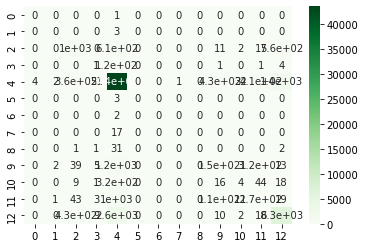

In [41]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, neighbors_pred)
ax = sns.heatmap(conf_matrix, annot=True, cmap='Greens')
plt.show()

## 9. Generating an ROC Curve

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
train_set, test_set = train_test_split(housing, test_size=.2, random_state=42)
features = housing[['Total_Sale_Price', 'Year_Built','Deeded_Acreage']] 
labels = label_binarize(housing['Num_Stories'], classes=["One Story","Two Story","Other"])
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3) 
n_classes = y_train.shape[1]
y_test

C:\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'